Assignment - I: Report

We have done the graph implementation using adjacency list (using dictionary data structure) among other implementation mechanisms of graph due to its compatibleness to the graphs we are asked to generate.

In [8]:
from collections import deque
import heapq
import random
import math

In [19]:
def maxRepeating(self, sequence: str, word: str) -> int:
        n = len(word)
        m = 0
        countt = 0
        if len(sequence) == 1 and sequence == word:
            return 1
        while n < len(sequence):
            if sequence[m:n] == word:
                countt += 1
                n += len(word)
                m += len(word)
            else:
                n += 1
                m += 1
            print(n, countt) 
        return countt


In [20]:
maxRepeating(3, "aaa", "a")

2 1
3 2


2

In [1]:
class Node:
    def __init__(self, data, location):
        self.data = data
        self.location = location

    def __str__(self):
        return self.data

class Graph:
    def __init__(self):
        self.adjacencyDic = {}

##  --------------------------------------------------------------------------------------------------------------- ##
##                                                                                                                  ##


##                                                 Graph Methods                                                    ##


##
##  ----------------------------------------------------------------------------------------------------------------##

    
    def createNode(self, data, location):
        """
        A function to create graph node and to add it to the adjacency dictionary for future access
        """
        newNode = Node(data, location)
        self.adjacencyDic[data] = [newNode, []]

    def insertEdge(self, start, end, weight):
        """
        A method to insert an edge to the graph connecting two nodes with some specified weight.
        """
        if start not in self.adjacencyDic:
            self.createNode(start, (random.uniform(1.0, 50) , random.uniform(1.0, 50)))
        
        if end not in self.adjacencyDic:
            self.createNode(end, (random.uniform(1.0, 50) , random.uniform(1.0, 50)))

        self.adjacencyDic[start][1].append((end, weight))
        self.adjacencyDic[end][1].append((start, weight))

    
    def deleteEdge(self, start, end, weight):
        """
        A method to delete an edge from the graph
        """
        self.adjacencyDic[start][1].remove((end, weight))
        self.adjacencyDic[end][1].remove((start, weight))

    def deleteNode(self, node_del):
        """
        A method to delete a node from the graph and to remove it from all of the edges which include it.
        """
        for neighbor in self.adjacencyDic[node_del]:
            nbr, cost = neighbor
            self.adjacencyDic[nbr].remove(node_del, cost)
        self.adjacencyDic.pop(node_del)
    
##
##  -----------------------------------------------------------------------------------------------##    

#                                   Search Algorithms 

##
##  -----------------------------------------------------------------------------------------------##


    def BFS(self, start, target):
        """
        Breadth-First-Search algorithm returns the path from start to end(the target location)
        """
        queue = deque([start])
        parent = {start: start}

        while queue:
            current_node = queue.popleft()
            if current_node == target:
                path = []
                while current_node != start:
                    path.append(current_node)
                    current_node = parent[current_node]
                
                path.append(start)
                return path[::-1]
            
            for neighbor, cost in self.adjacencyDic[current_node][1]:
                if neighbor not in parent:
                    queue.append(neighbor)
                    parent[neighbor] = current_node

        return None


    def DFS(self, start, target):
        """
        Depth-First-Search algorithm returns the path from start to end(the target location)
        """
        stack = [start]
        parent = {start: None}

        while stack:
            current_node = stack.pop()
            if current_node == target:
                path = []
                while current_node != start:
                    path.append(current_node)
                    current_node = parent[current_node]
                
                path.append(start)
                return path[::-1]

            for neighbor, cost in self.adjacencyDic[current_node][1]:
                if neighbor not in parent:
                    stack.append(neighbor)
                    parent[neighbor] = current_node

        return None

    def UCS(self, start, end):
        """
        Uniform-Cost-Search algorithm which returns the path from start to end(the target location)
        """
        visited = set()
        heap = [(0, start, [])]  # Priority queue: (cost, node, path)

        while heap:
            cost, current_node, path = heapq.heappop(heap)

            if current_node == end:
                return path + [current_node]

            visited.add(current_node)

            for neighbor, cur_cost in self.adjacencyDic[current_node][1]:
                if neighbor not in visited:
                    heapq.heappush(heap, (cost + cur_cost, neighbor, path + [current_node]))

    def iterative_deepening_search(self, start, end, max_depth=10):
        """
        Iterative Deepening Search returns the path from start to end(the target location)

        This function uses depth_limited_search as helper function to apply DFS algorithm 
        giving it different depths which increases each time.
        """
        for depth in range(1, max_depth + 1):
            result = self.depth_limited_search(start, end, depth)
            if result:
                return result

    def depth_limited_search(self, start, end, depth):
        """
        Helper function for the iteratice_deepining_search algorithm applying DFS algorithm for
        given distances
        """
        visited = set()

        def dfs(node, path, current_depth):
            if node == end:
                return path + [node]
            if current_depth <= 0:
                return None

            visited.add(node)
            for neighbor, cost in self.adjacencyDic[node][1]:
                if neighbor not in visited:
                    new_path = dfs(neighbor, path + [node], current_depth - 1)
                    if new_path:
                        return new_path
            return None

        return dfs(start, [], depth)

    def bidirectional_search(self, start, end):
        """
        Bidirectional Search Algorithm which returns the path from start to end(the target location)
        """
        forward_parent = {start: None}
        backward_parent = {end: None}
        forward_queue = deque([start])
        backward_queue = deque([end])

        while forward_queue and backward_queue:
            forward_node = forward_queue.popleft()
            backward_node = backward_queue.popleft()

            if forward_node in backward_parent or backward_node in forward_parent:
                cur = forward_node if forward_node in backward_parent else backward_node
                path = []
                forw = cur
                while forw != start:
                    path.append(forw)
                    forw = forward_parent[forw]
                path.append(start)
                path.reverse()

                while cur != end:
                    cur = backward_parent[cur]
                    path.append(cur)
                return path

            for neighbor, cost in self.adjacencyDic[forward_node][1]:
                if neighbor not in forward_parent:
                    forward_queue.append(neighbor)
                    forward_parent[neighbor] = forward_node

            for neighbor, cost in self.adjacencyDic[backward_node][1]:
                if neighbor not in backward_parent:
                    backward_queue.append(neighbor)
                    backward_parent[neighbor] = backward_node
    
    
    def astar_search(self, start, end, heuristic):
        """
        A-star search algorithm which returns the path from start to end using the heroistic function and cost it already used 
        to reach to specific node.

        Heroistic Function in our case is the haversine distance which is calculated to be the geographical distance between the
        current node and the destination of the path.
        """
        open_set = [(0 + heuristic(start, end), 0, start, [])]  # (f-cost, g-cost, node, path)
        visited = set()
        while open_set:
            _, cost, current_node, path = heapq.heappop(open_set)
            if current_node == end:
                return path + [current_node]
            
            visited.add(current_node)

            for neighbor, cur_cost in self.adjacencyDic[current_node][1]:
                if neighbor not in visited:
                    new_cost = cost + cur_cost
                    new_path = path + [current_node]
                    f_cost = new_cost + heuristic(neighbor, end)
                    heapq.heappush(open_set, (f_cost, new_cost, neighbor, new_path))

    def greedy(self, start, end, heuristic):
        """
        Greedy Search algorithm which returns the path from start to end(the target location)
        """
        current = (heuristic(start, end), start, [])  # (heuristic, node, path)
        visited = set()
        while current:
            heu_cost, current_node, path = current
            visited.add(current_node)
            current = None
            mini = float("inf")
            if current_node == end:
                return path + [current_node]

            for neighbor, cur_cost in self.adjacencyDic[current_node][1]:
                if neighbor not in visited:
                    new_path = path + [current_node]
                    cur = heuristic(neighbor, end)
                    if cur < mini:
                        current = (cur, neighbor, new_path)
                        mini = cur

    def haversine_distance(self, node_a, node_b):
        """
        A function which calculates the physical geographical distance between node_a and node_b using the longitude and
        latitude value given from the text data.

        This function serves as a helper function for the astar search algorithm.
        """

        lat1, lon1 = self.adjacencyDic[node_a][0].location
        lat2, lon2 = self.adjacencyDic[node_b][0].location

        lat1 = math.radians(lat1)
        lon1 = math.radians(lon1)
        lat2 = math.radians(lat2)
        lon2 = math.radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        radius_earth = 6371  
        distance = radius_earth * c

        return distance

    def find_path_length(self, path):
        """
        A function to calculate the path length between two nodes.
        """
        total_cost = 0
        for p in range(len(path)-1):
            cur = path[p]
            for nbr, cost in self.adjacencyDic[cur][1]:
                if nbr == path[p+1]:
                    total_cost += cost
        return total_cost


Using the above graph implementation and search algorithm implementation, we can now test the graph and search algorithm using two cities from the given sample data. 

In [9]:
import random
import timeit
import matplotlib.pyplot as plt

## Question 1
### Romania Map
romania = Graph()
with open('cities.txt', 'r') as file:
    for line in file:
        c = line.strip().split()
        if c[0] == "City":
            continue
        romania.createNode(c[0], (float(c[1]), float(c[2])))

with open('edges.txt', 'r') as file:
    for line in file:
        c = line.strip().split()
        romania.insertEdge(c[0], c[1], int(c[2]))

x = romania.astar_search("Arad", "Bucharest", romania.haversine_distance)
y = romania.UCS("Arad", "Bucharest")
w = romania.BFS("Arad", "Bucharest")
z = romania.DFS("Arad", "Bucharest")
a = romania.iterative_deepening_search("Arad", "Bucharest")
b = romania.bidirectional_search("Arad", "Bucharest")
c = romania.greedy("Arad", "Bucharest", romania.haversine_distance)

print("DFS",z, romania.find_path_length(z))
print("BFS",w, romania.find_path_length(w))
print("UCS",y, romania.find_path_length(y))
print("bidirectional", b, romania.find_path_length(b))
print("greedy", c, romania.find_path_length(c))
print("iterative", a, romania.find_path_length(a))
print("a*", x, romania.find_path_length(x))

### Romaina Map


#------------------------------###------------------------------#

DFS ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest'] 733
BFS ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450
UCS ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest'] 418
bidirectional ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450
greedy ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest'] 418
iterative ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450
a* ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest'] 418


The results and the total distance of the pathes in this graph setting from the above print results

 - astar > greedy >= ucs >= iterative_depening >= bidirectional >= bfs >= dfs

The following is a python script to generate the 16 random graphs and apply each of the search algorithms on each graph five times.

In [10]:
## Question 2
### Random graphs

def generate_random_graph(n, p):
    # Randomly generating graph with n nodes and p probability of edges
    random_graph = Graph()
    for i in range(1, n + 1):
        if i not in random_graph.adjacencyDic:
            random_graph.createNode(i, (random.uniform(1.0, 50) , random.uniform(1.0, 50)))
        for j in range(i+1, n + 1):
            if random.random() < p:
                random_graph.insertEdge(i, j, random.randint(1,100))
    return random_graph

graph1 = generate_random_graph(10, 0.2)
graph2 = generate_random_graph(10, 0.4)
graph3 = generate_random_graph(10, 0.6)
graph4 = generate_random_graph(10, 0.8)

graph5 = generate_random_graph(20, 0.2)
graph6 = generate_random_graph(20, 0.4)
graph7 = generate_random_graph(20, 0.6)
graph8 = generate_random_graph(20, 0.8)

graph9 = generate_random_graph(30, 0.2)
graph10 = generate_random_graph(30, 0.4)
graph11 = generate_random_graph(30, 0.6)
graph12 = generate_random_graph(30, 0.8)

graph13 = generate_random_graph(40, 0.2)
graph14 = generate_random_graph(40, 0.4)
graph15 = generate_random_graph(40, 0.6)
graph16 = generate_random_graph(40, 0.8)

Graphs = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8, graph9, graph10, graph11, graph12, graph13, graph14, graph15, graph16]

graph_paths = []
graph_times = []
for g in range(len(Graphs)):
    graph = Graphs[g]
    random_nodes = []
    while len(random_nodes) < 10:
        x = random.randint(1, 10*(g//4+1))
        if x not in random_nodes:
            random_nodes.append(x)

    algos = ["bfs", "dfs", "greedy", "ucs", "iterative_deepening_search", "astar", "bidirectional"]
    
    graph_times.append([])
    graph_paths.append([])
    for algo in algos:
        # For each algorithm we will calculate the time and path taken for the path between the nodes from the 10 randomly taken nodes
        algo_time = 0   
        algo_path = 0 

        # We calculate for all connection among the 10 random nodes 5 times for each path 
        for i in range(len(random_nodes)):
            for j in range(i, len(random_nodes)):
                for _ in range(5):
                    start_time = timeit.default_timer()
                    if algo == "dfs":
                        path = graph.DFS(random_nodes[i], random_nodes[j])
                    elif algo == "bfs":
                        path = graph.BFS(random_nodes[i], random_nodes[j])
                    elif algo == "greedy":
                        path = graph.greedy(random_nodes[i], random_nodes[j], graph.haversine_distance)
                    elif algo == "iterative_deepening_search":
                        path = graph.iterative_deepening_search(random_nodes[i], random_nodes[j], 10)
                    elif algo == "astar":
                        path = graph.astar_search(random_nodes[i], random_nodes[j], graph.haversine_distance)
                    elif algo == "ucs":
                        path = graph.UCS(random_nodes[i], random_nodes[j])
                    elif algo == "bidirectional":
                        path = graph.bidirectional_search(random_nodes[i], random_nodes[j])

                    end_time = timeit.default_timer()
                
                    if path:
                        algo_path += graph.find_path_length(path)
                    algo_time += end_time - start_time

        graph_paths[-1].append(algo_path)
        graph_times[-1].append(algo_time/5)


The analysis and the coclusion is drawn from the time and path distance graph generated by the following script which generates the visual graph of each of the above 16 graphs for the 7 different search algorithms. The following function uses the matplotlib to generate the visual graph.

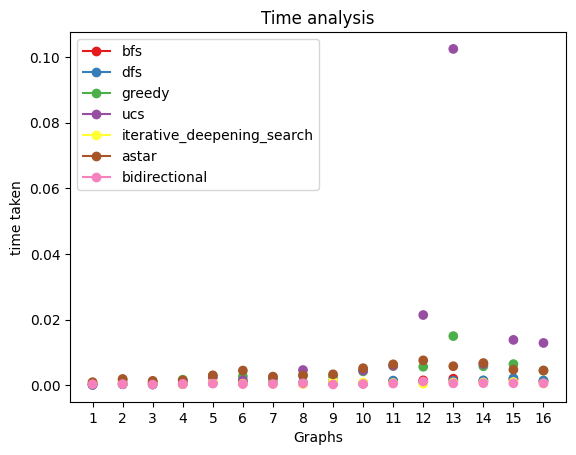

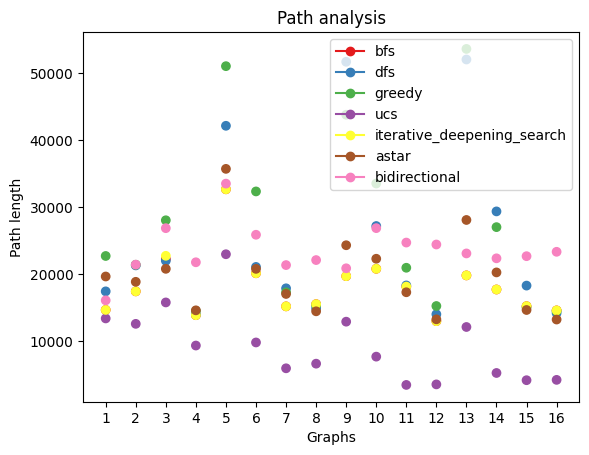

In [11]:
def draw_plot(data, title, y_label):
    # Labels for each index position
    labels = ["bfs", "dfs", "greedy", "ucs", "iterative_deepening_search", "astar", "bidirectional"]

    # Create a list of x values (from 1 to 16)
    x_values = list(range(1, 17))

    # Create a color map with a unique color for each index position
    color_map = plt.get_cmap('Set1')
    num_colors = len(data[0])
    colors = [color_map(i/num_colors) for i in range(num_colors)]

    # Create a figure and axis object
    fig, ax = plt.subplots()
    # Loop through each list in the data and plot as a scatter plot with unique color
    for i in range(len(data)):
        ax.scatter([x_values[i]]*7, data[i], marker="o", color=colors, label=i)

    # Set the x-axis tick labels
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values)

    # Set the x and y axis labels
    ax.set_xlabel('Graphs')
    ax.set_ylabel(y_label)

    # Set the plot title
    ax.set_title(title)

    # Create a legend with the labels
    handles, _ = ax.get_legend_handles_labels()

    handles = [plt.Line2D([], [], marker='o', color=colors[i], label=labels[i]) for i in range(len(labels))]
    # labels_legend = [labels[i] for i in range(len(data[0]))]
    ax.legend(handles=handles)

    # Show the plot
    plt.show()

draw_plot(graph_times, "Time analysis", "time taken")
draw_plot(graph_paths, "Path analysis", "Path length")
